# Problem Statement:

Persistency of drug as per the physician prescription

# ML Problem: Classification

# Target Variable: Persistency_Flag

Feature Description:

Unique Row Id	
Patient ID	
Persistency_Flag	
Demographics:
 - Age	
 - Race	
 - Region
 - Ethnicity	
 - Gender	
 - IDN Indicator	---Flag indicating patients mapped to IDN

Provider Attributes	

 - NTM - Physician Specialty -----	Specialty of the HCP that prescribed the NTM Rx
 - NTM - T-Score 	
 - T Score       ------        at the time of the NTM Rx (within 2 years prior from rxdate)
 - Change in T Score 	------ before starting with any therapy and after receiving therapy  
                         (Worsened, Remained Same, Improved, Unknown)
 - NTM Risk Segment	---- at the time of the NTM Rx (within 2 years days prior from rxdate)
 - Change in Risk Segment	before starting with any therapy and after receiving therapy
                         (Worsened, Remained Same, Improved, Unknown)
 - NTM Multiple Risk Factors -----	if  patient falls under multiple risk category (having more than 1 risk) at the time of the NTM Rx (within 365 days prior from rxdate)

Clinical Factors:

 - NTM - Dexa Scan Frequency	----Number of DEXA scans taken prior to the first NTM Rx date (within 365 days prior from rxdate)
 - NTM - Dexa Scan Recency	 ----   the presence of Dexa Scan before the NTM Rx (within 2 years prior from rxdate or between their first Rx and Switched Rx; whichever is smaller and applicable)
 - Dexa During Therapy	  -----      if the patient had a Dexa Scan during their first continuous therapy
 - NTM - Fragility Fracture Recency	if the patient had a recent fragility fracture (within 365 days prior from rxdate)
 - Fragility Fracture During Therapy ----	if the patient had fragility fracture  during their first continuous therapy
 - NTM - Glucocorticoid Recency	  usage of Glucocorticoids (>=7.5mg strength) in the one year look-back from the first NTM Rx
 - Glucocorticoid Usage During Therapy	---if the patient had a Glucocorticoid usage during the first continuous therapy
 - NTM - Injectable Experience	-----any injectable drug usage in the recent 12 months before the NTM OP Rx
 - NTM - Risk Factors	------- Risk Factors that the patient is falling into. 
                                for chronic Risk Factors complete lookback to be applied 
                                for non-chronic Risk Factors, one year lookback from the date of first OP Rx 
 
 
Disease/Treatment Factor

 - NTM - Comorbidity 	-----Comorbidities are divided into two main categories based on the ICD codes
                               Acute 
                               Chronic --- For chronic disease we are taking complete look back from the first Rx date of NTM therapy and for acute diseases, time period  before the NTM OP Rx with one year lookback has been applied
                              
 - NTM - Concomitancy	Concomitant drugs recorded prior to starting with a therapy(within 365 days prior from first rxdate)
 - Adherence	Adherence for the therapies

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn import preprocessing

In [3]:
!/usr/bin/env python -W ignore::DeprecationWarning

The system cannot find the path specified.


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
ds = pd.read_excel('C:\\Users\\user\\Downloads\\git_v3\\HealthCare_project\\Healthcare_dataset.xlsx', 'Dataset', index_col=None)
ds.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [3]:
# import lux

In [14]:
# ds

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [15]:
# ds.save_as_html()

Saved HTML to export.html


In [165]:
ds.shape

(3424, 69)

In [166]:
len(ds.columns)

69

In [167]:
ds.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Com

# Empty values

In [8]:
found = False
for column in ds.columns:
    if ds[column].isnull().sum() != 0:
        found = True
        print('Column',column, 'has null values')
if found  == False:
    print('The dataset does not contain empty values')

The dataset does not contain empty values


# Duplications

In [223]:
ds[ds.duplicated(['Ptid'], keep=False)]

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks


No duplications

# Replace all N -> 0 and Y -> 1

In [9]:
ds = ds.replace(['N','Y'],[0,1])

# Columns that contain only one category or outliers

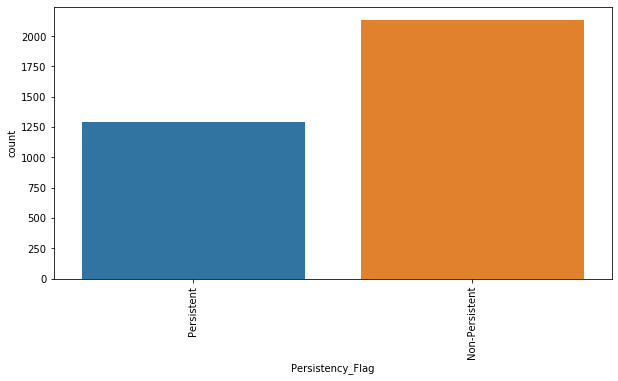

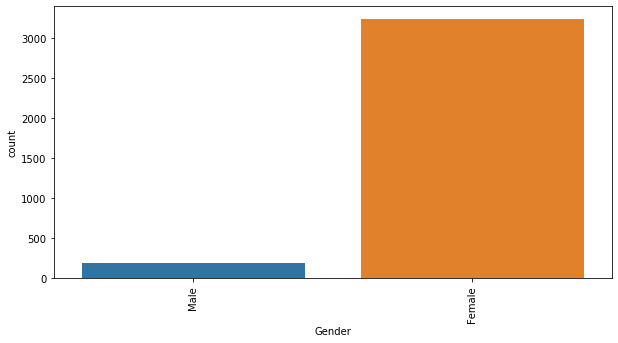

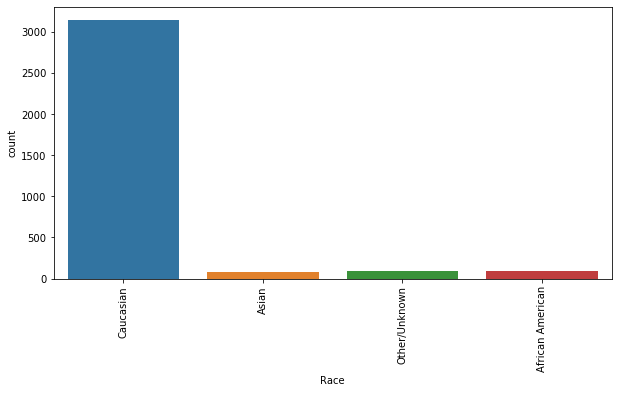

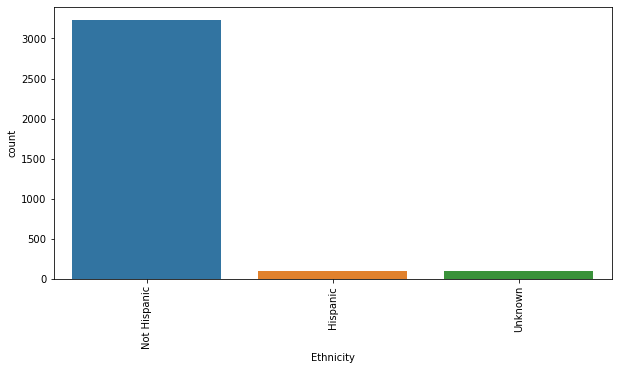

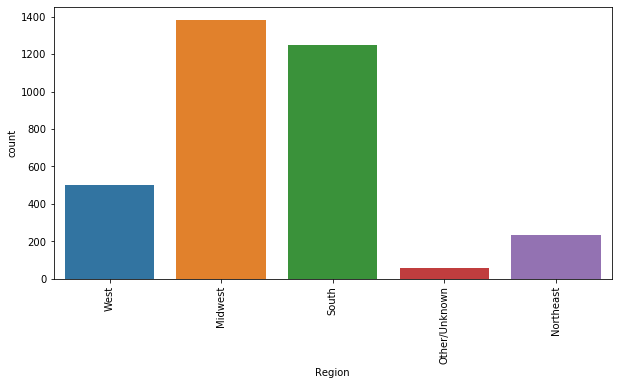

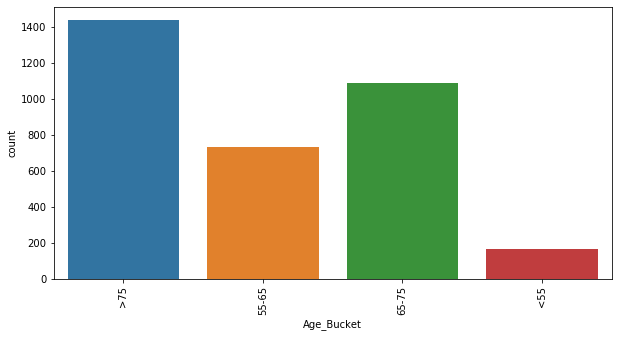

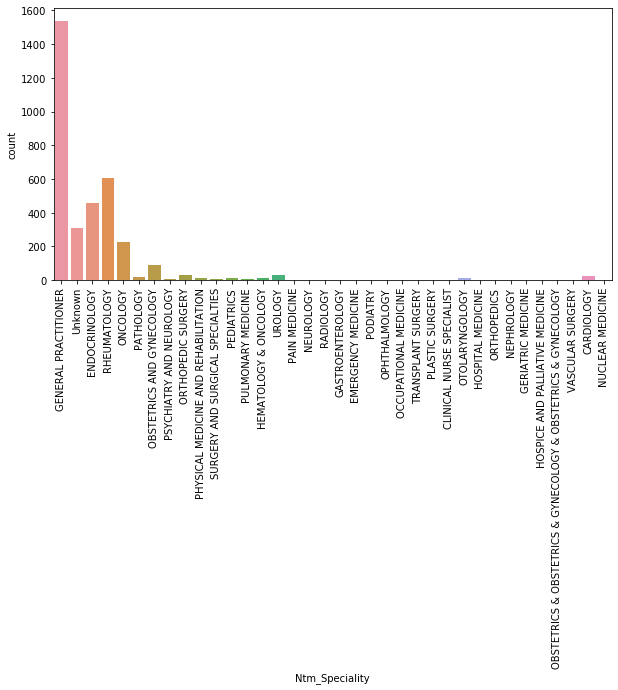

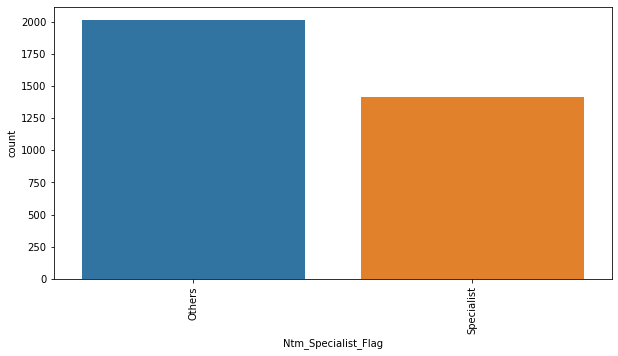

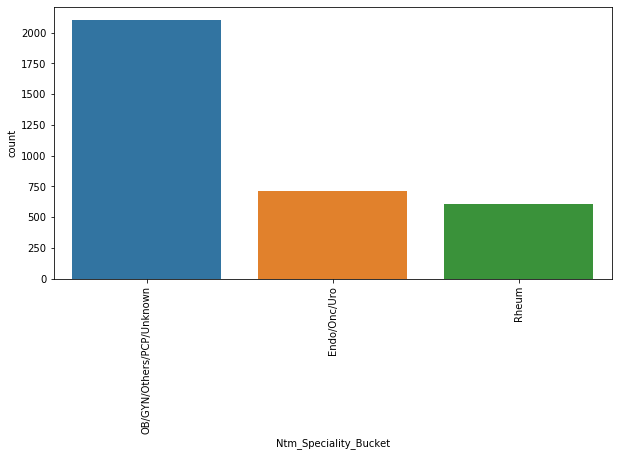

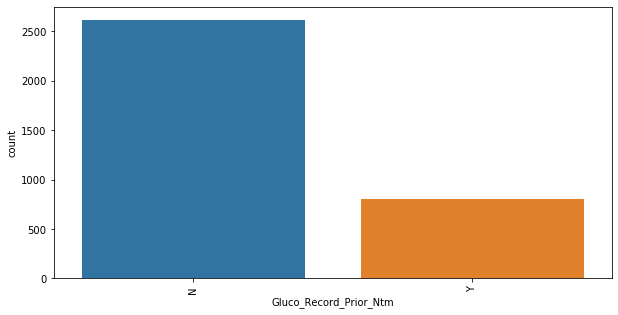

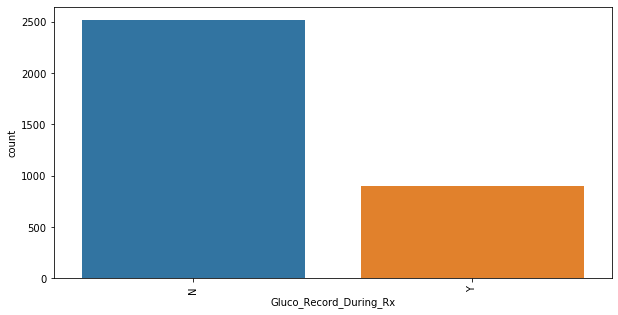

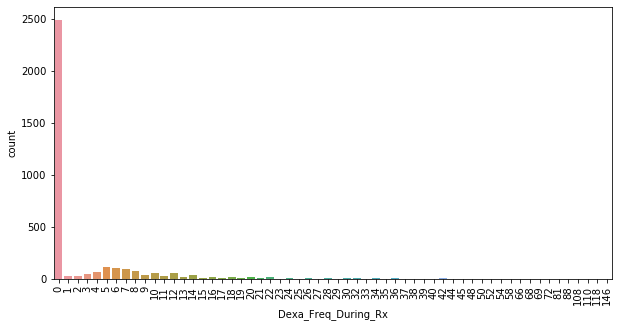

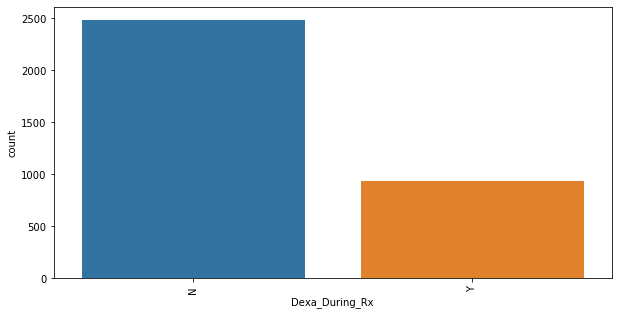

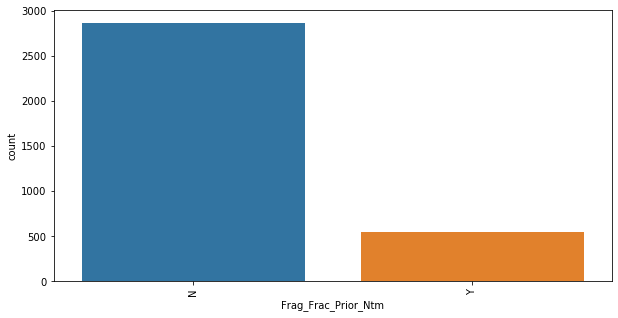

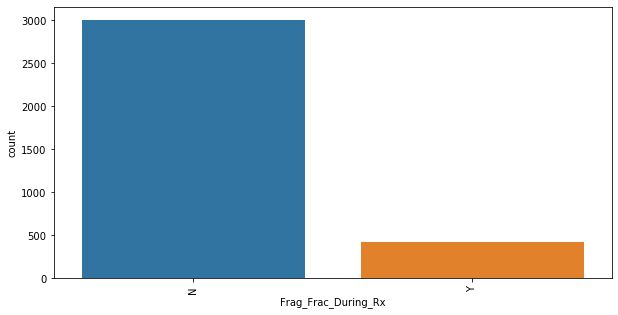

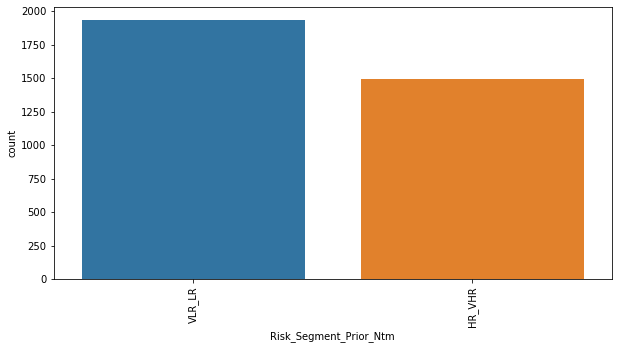

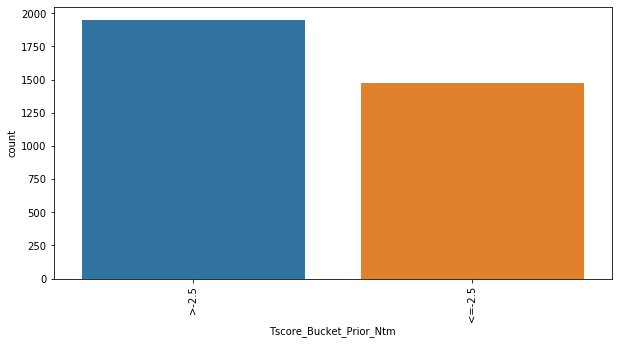

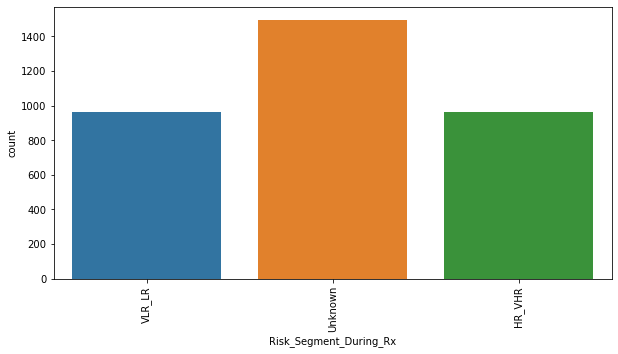

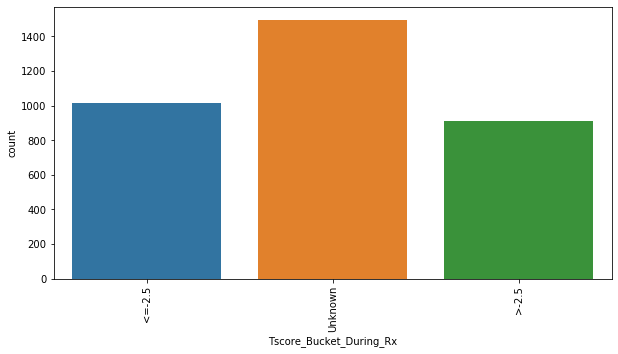

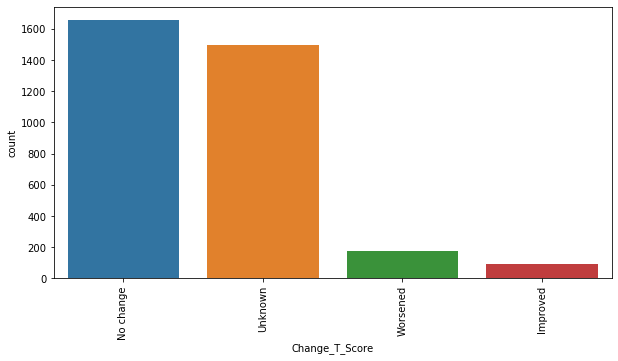

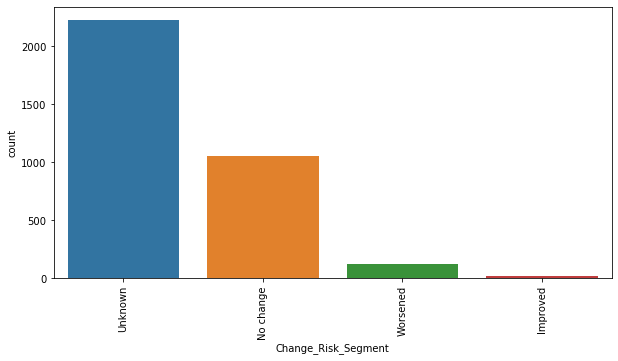

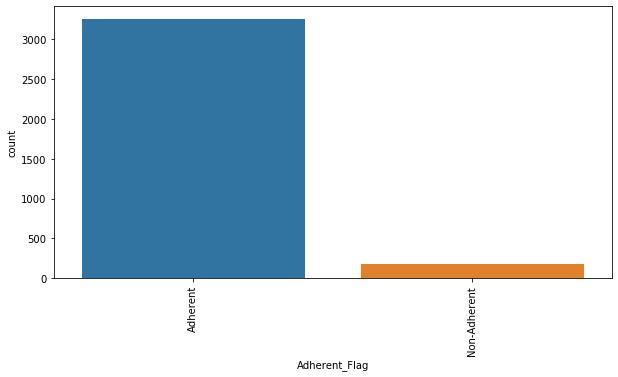

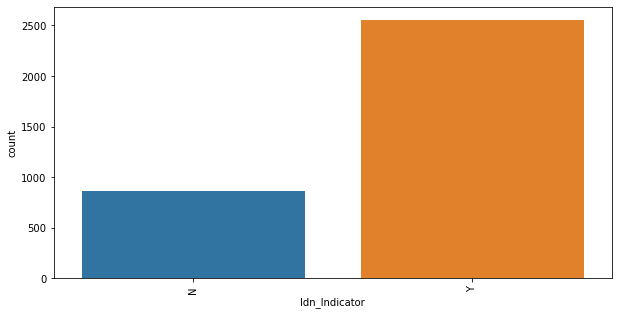

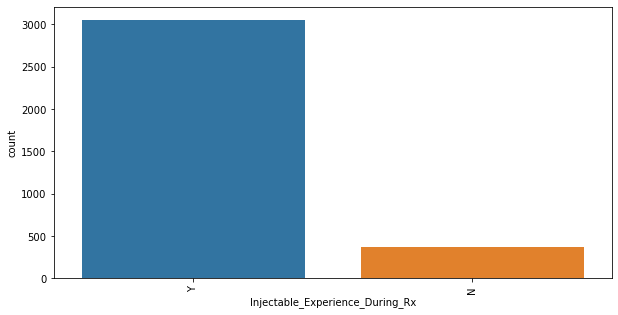

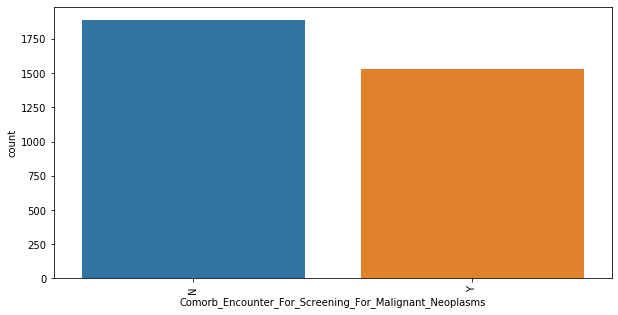

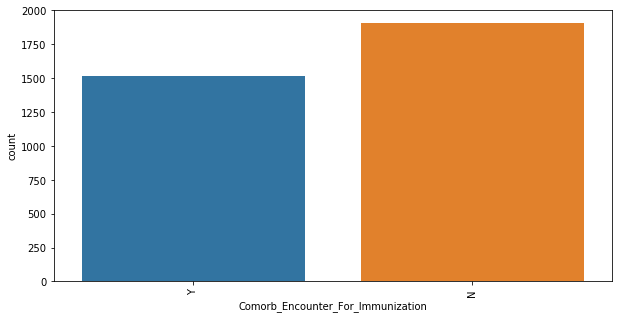

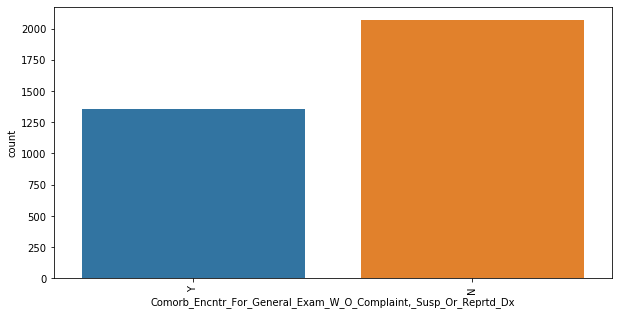

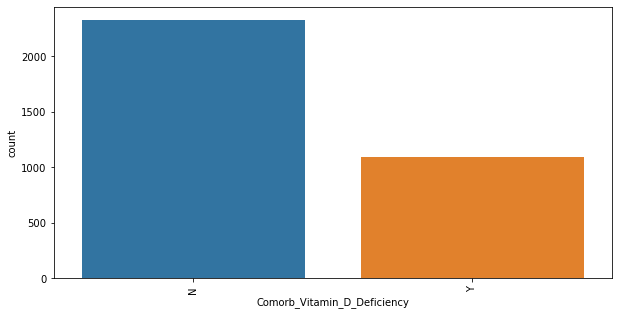

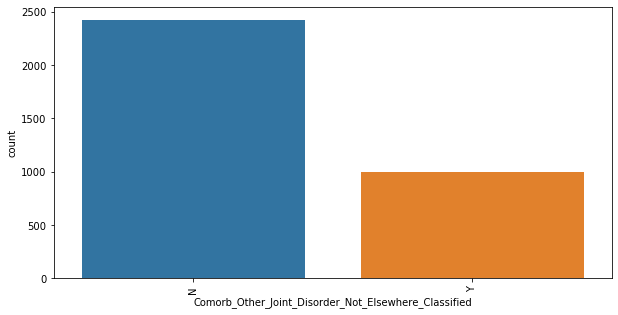

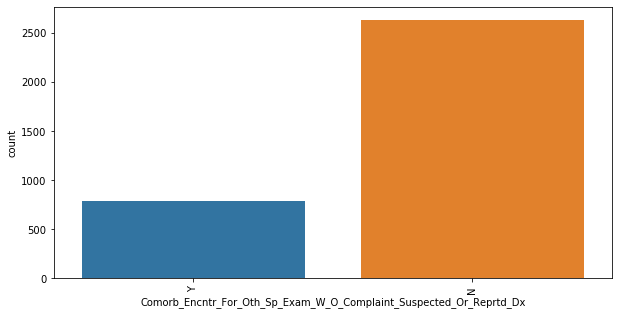

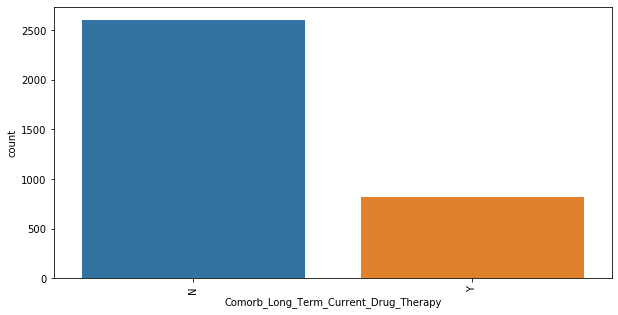

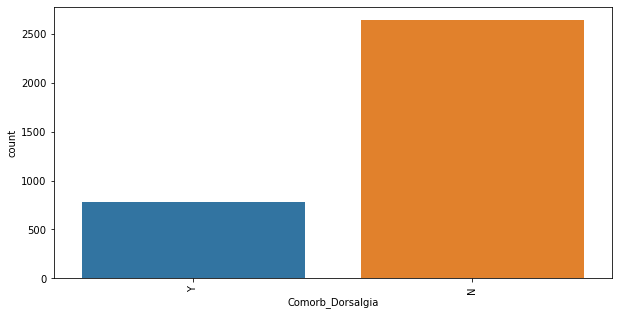

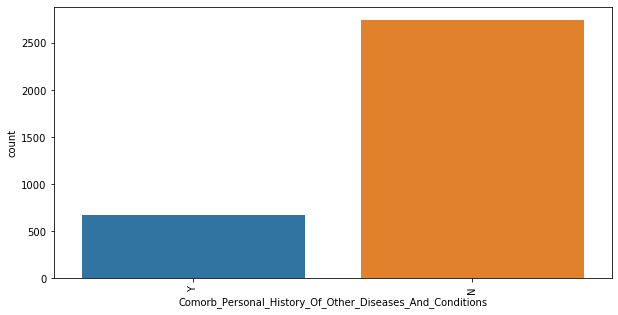

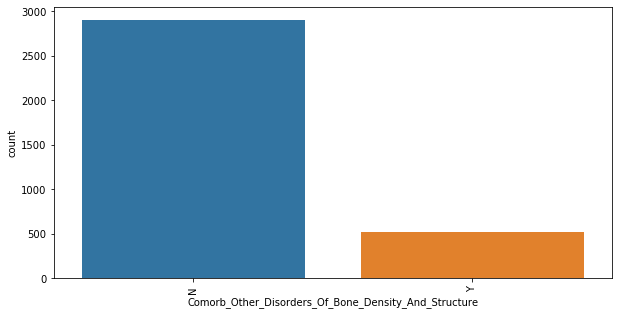

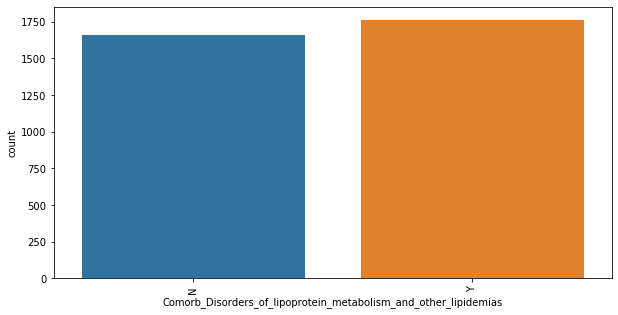

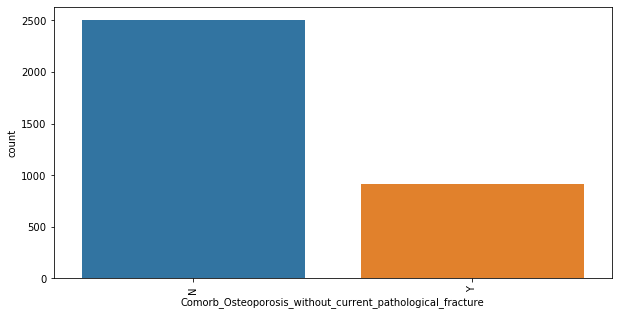

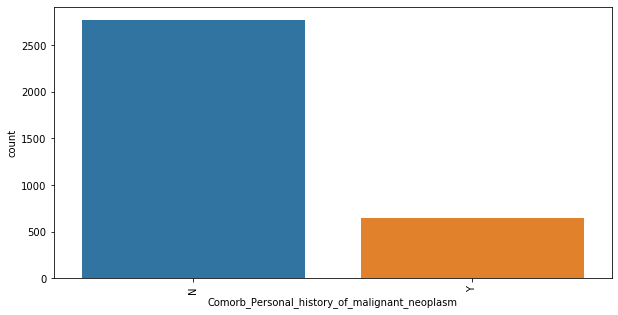

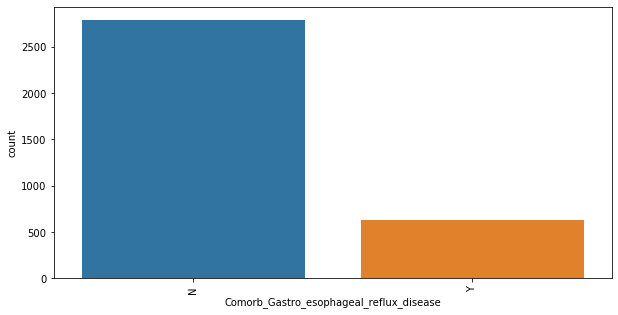

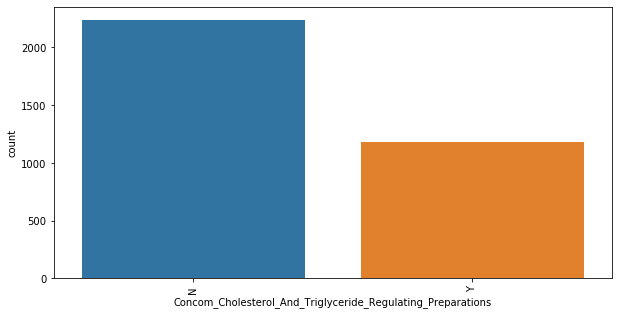

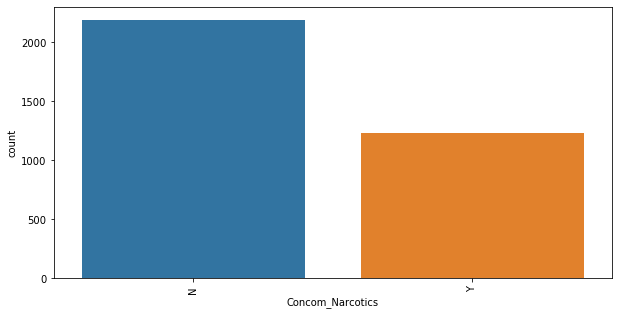

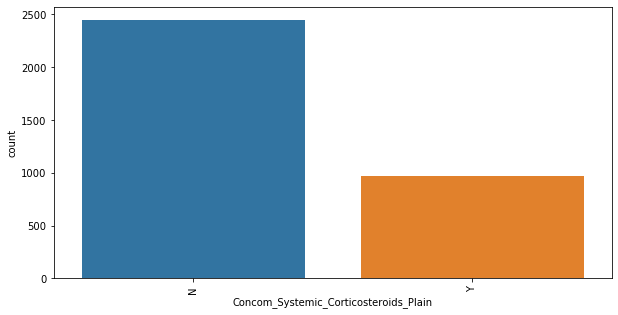

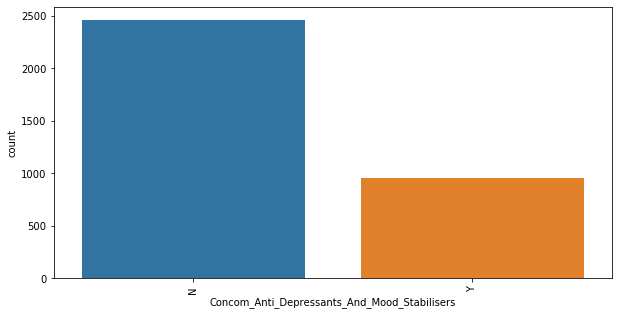

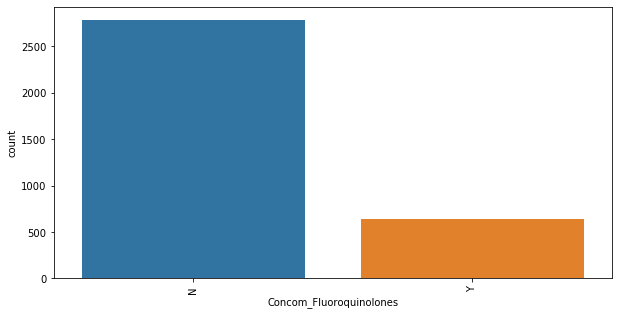

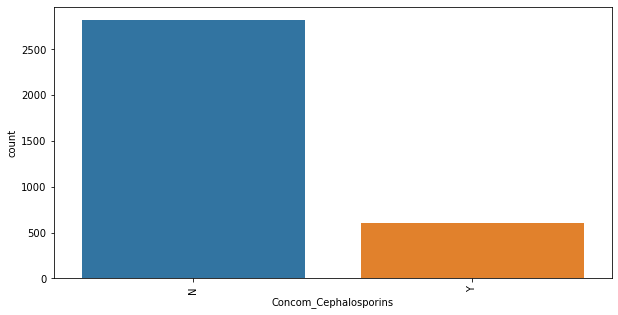

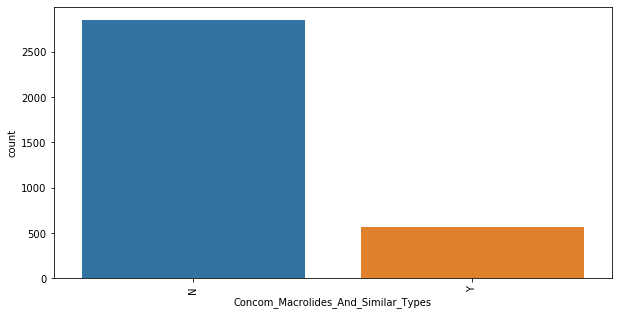

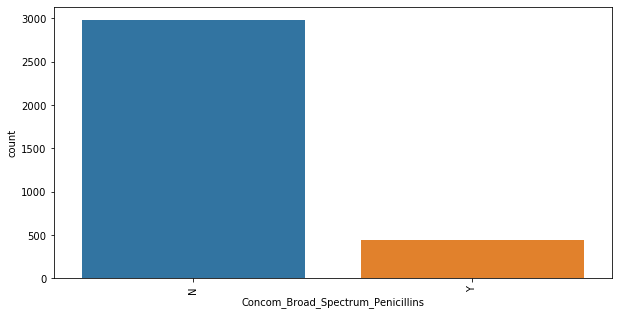

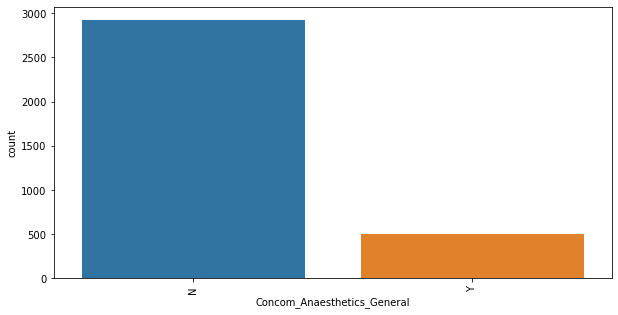

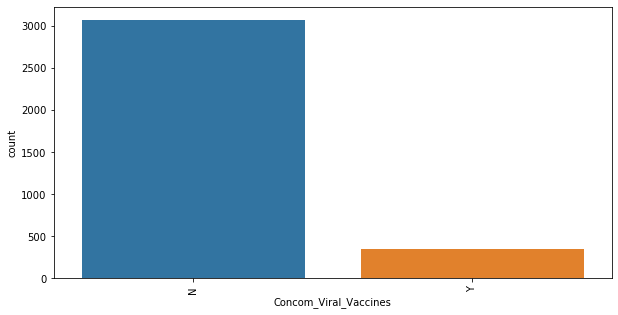

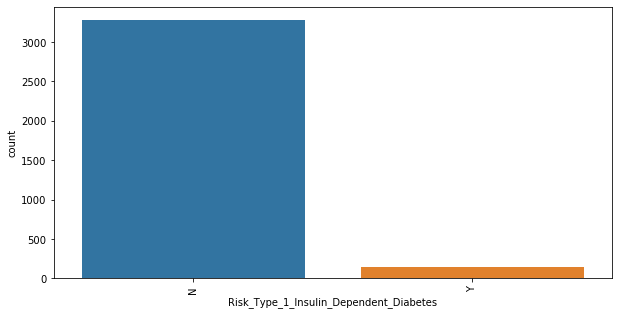

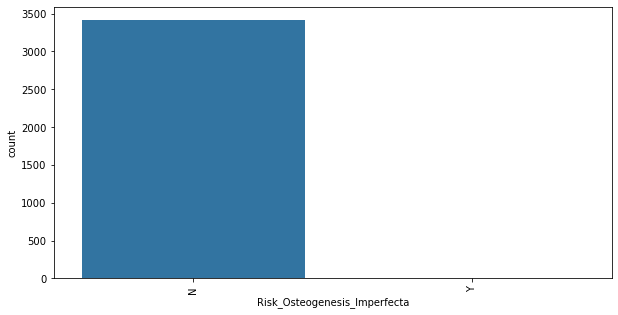

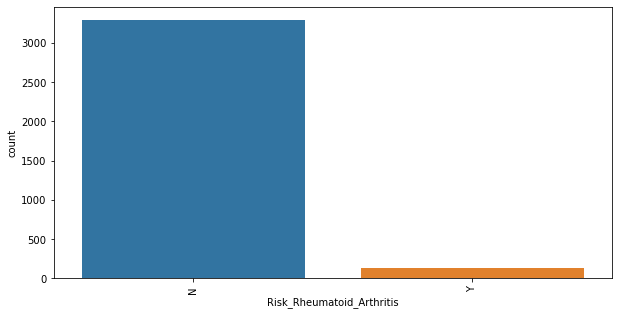

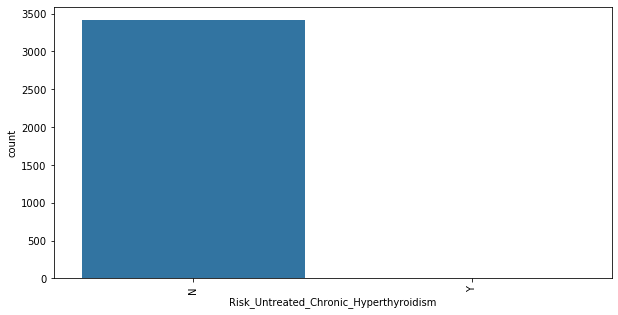

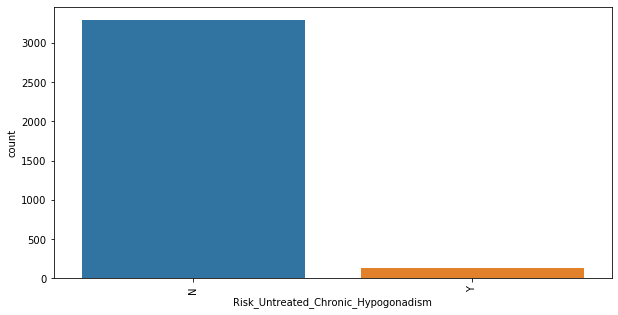

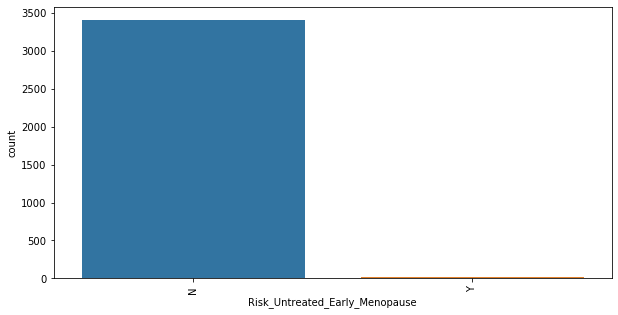

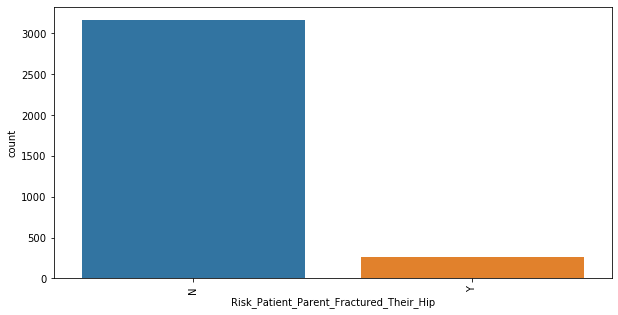

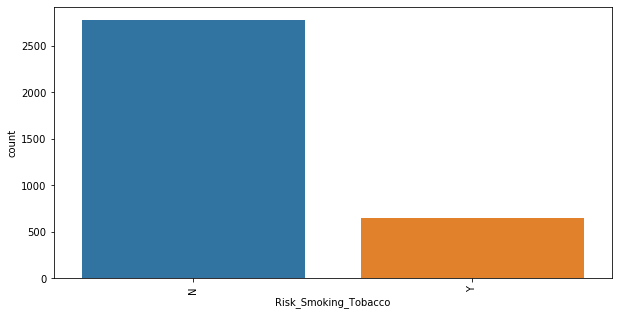

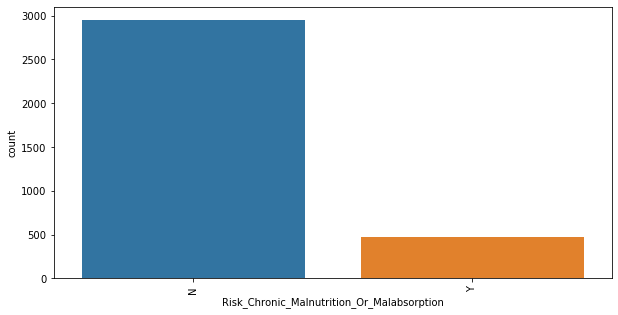

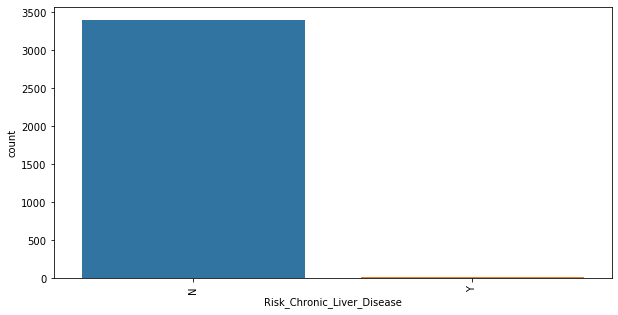

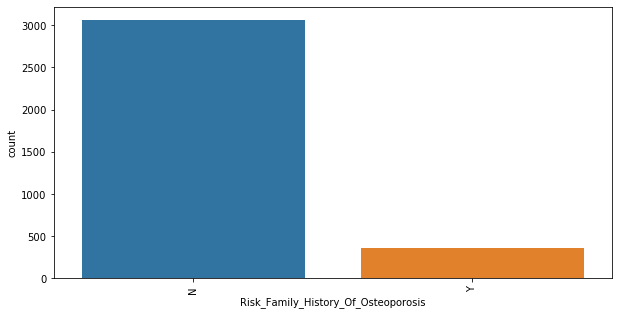

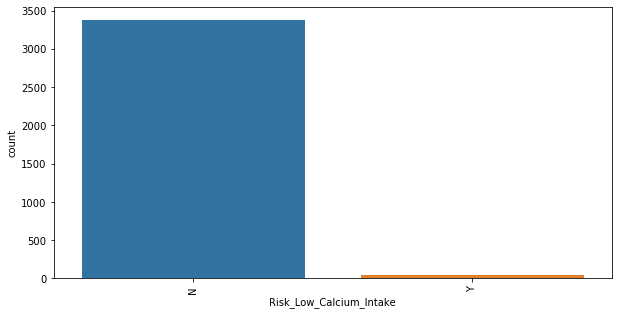

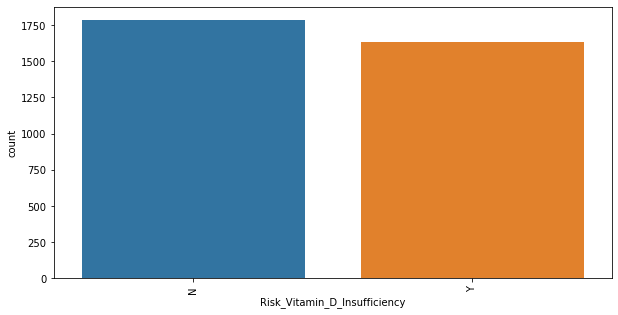

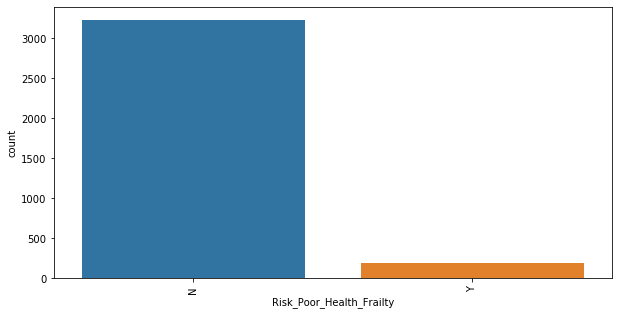

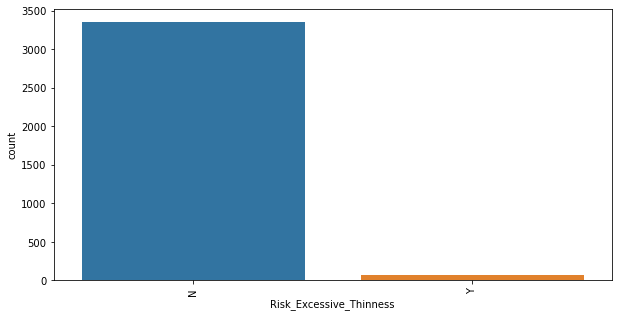

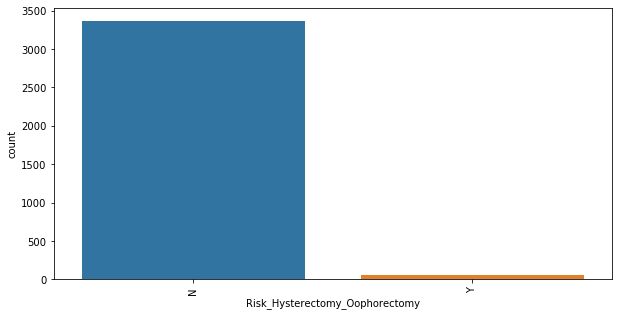

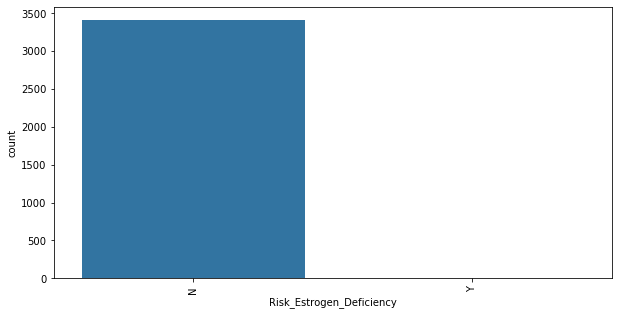

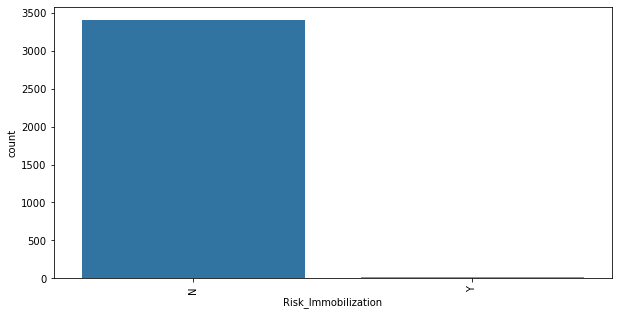

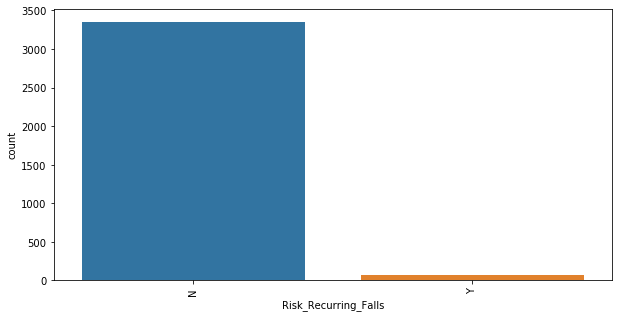

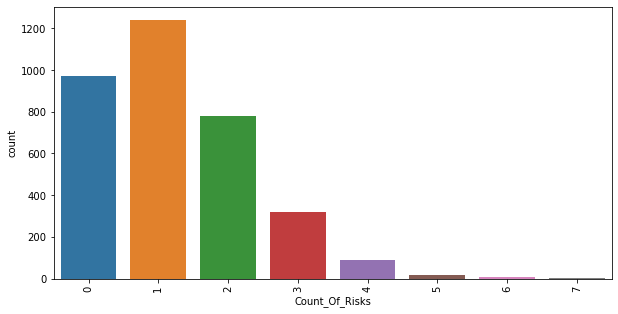

In [6]:
for column in ds.columns[1:]:
    plt.figure(figsize=(10, 5))
    sns.countplot(ds[column])
    plt.xticks(rotation=90)

From EDA we may say that:
    
    1.Patiens are mostly females, hypsanic race, coming from mildwest or south predominantly, having the age >55.
    
    2.Most of the patients are not persistent to the drugs.
    
    3.Change in Risk Segment is usually unknown or no change, very few worsened or even improved.
    
    4.There is usually at most 4 risks when taking the drugs. The risks usually are minimal either none, either 1 or 2.
    The risk that may appear concerns risk_smoking_tobacco, risk_malnutrition_or_malabsorption,risk_famili_hystory_of_osteoporosis and risk_vitamin_s_insufficiency.


By analysing the plots, we may say that:

Target classes are quite imbalanced.

The empty values are actualyy "Unknown" and sometimes met as "Other/Unknown" values.

Columns with outliers:

 - Gender : predominant females, the rest outliers
 - Race:  predominant Caucasian, the rest outliers
 - Ethnicity: predonimamnt Not hispanic, the rest outliers
 - Region: cathegory other outliers
 - Ntm_specialty : predonimant categories: general_preactitioner, unknoen, endocrinology, rheumatology, oncology, obstretics and gynecology; the rest outliers
 - Dexa_freq_during_rx : predominant : 0; the rest outliers
 - Adherent_flag: predominant adherent;  the rest outliers
 - Risk_Type_1_Insulin_Dependent_Diabetes: predominant False(0); True(1) outlier
 - Risk_Osteogenesis_Imperfecta: predominant False; True outlier
 - Risk_Rheumatoid_Arthritisitis: predominant False; True outlier
 - Risk_Untreated_Chronic_Hyperthyroidism: predominant False; True Outlier
 - Risk_Untreated_Chronic_Hypogonadism: predominant False; True Outlier
 - Risk_Untreated_Early_Menopause: predominant False; True Outlier
 - Risk_Patient_Parent_Fractured_Their_Hip: predominant False; True Outlier
 - Risk_Chronic_Liver_Disease: predominant False; True Outlier
 - Risk_Low_Calcium_Intake :predominant False; True Outlier
 - Risk_Poor_Health_Frailty: predominant False; True Outlier
 - Risk_Excessive_Thinness: predominant False; True Outlier
 - Risk_Hysterectomy_Oophorectomy: predominant False; True Outlier
 - Risk_Estrogen_Deficiency: predominant False; True Outlier
 - Risk_Immobilization : predominant False; True Outlier
 - Risk_Recurring_Falls: predominant False; True Outlier
 - Count_of_risks: 5,6,7 outliers


# NAN values

In [5]:
na_values = ['Unknown','Other/Unknown'] # add all values that should be converted to np.nan
ds = pd.read_excel('C:\\Users\\user\\Downloads\\git_v3\\HealthCare_project\\Healthcare_dataset.xlsx', 
                   'Dataset', index_col=None,na_values= na_values, keep_default_na = False)


In [6]:
found = False
list_column_nan = []
for column in ds.columns:
    if ds[column].isnull().sum() != 0:
        found = True
        print('Column',column, 'has', ds[column].isnull().sum(),' null values')
        list_column_nan.append(column)
if found  == False:
    print('The dataset does not contain empty values')

Column Race has 97  null values
Column Ethnicity has 91  null values
Column Region has 60  null values
Column Ntm_Speciality has 310  null values
Column Risk_Segment_During_Rx has 1497  null values
Column Tscore_Bucket_During_Rx has 1497  null values
Column Change_T_Score has 1497  null values
Column Change_Risk_Segment has 2229  null values


See plots how many NaN points are, related to other column categories.
![image info](./change_risk_Segment.png)
![image info](./change_t_score.png)
![image info](./ethnicity.png)
![image info](./ntm_specialty.png)
![image info](./risk_segment_during_rx.png)
![image info](./tscore_bucket_during_rx.png)

We may distinguish some cases:
    1. NaN values occurence is higher than the other column categories.
        Example 3 classes, NaN values occurence is the highest and the other 2 categories occurencies have almost
        similar dirtibution:
             - Relacing the NaN values with the category that has the highest ocuurence, we influence learning on
               only one category. 
             - We may replace half of NaN with one category and the other half with the other.
             - We may delete them 
             - We may predict them
    2. NaN values occurence is very lower than the other column categories. -> in this case it is suitable to 
       replace them with the category that has the highest occurence
    

# Predicting unknown values

In [7]:
ds = ds.replace(['N','Y'],[0,1])

In [8]:
list_columns_need_labelling = ['Persistency_Flag', 'Gender', 'Race','Ethnicity','Region','Age_Bucket','Ntm_Speciality','Ntm_Specialist_Flag','Ntm_Speciality_Bucket','Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment', 'Adherent_Flag']

['African American' 'Asian' 'Caucasian']
[0 1 2]
(3327, 60)
(97, 60)
['Hispanic' 'Not Hispanic']
[0 1]
(3333, 60)
(91, 60)
['Midwest' 'Northeast' 'South' 'West']
[0 1 2 3]
(3364, 60)
(60, 60)
['CARDIOLOGY' 'CLINICAL NURSE SPECIALIST' 'EMERGENCY MEDICINE'
 'ENDOCRINOLOGY' 'GASTROENTEROLOGY' 'GENERAL PRACTITIONER'
 'GERIATRIC MEDICINE' 'HEMATOLOGY & ONCOLOGY'
 'HOSPICE AND PALLIATIVE MEDICINE' 'HOSPITAL MEDICINE' 'NEPHROLOGY'
 'NEUROLOGY' 'NUCLEAR MEDICINE'
 'OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY'
 'OBSTETRICS AND GYNECOLOGY' 'OCCUPATIONAL MEDICINE' 'ONCOLOGY'
 'OPHTHALMOLOGY' 'ORTHOPEDIC SURGERY' 'ORTHOPEDICS' 'OTOLARYNGOLOGY'
 'PAIN MEDICINE' 'PATHOLOGY' 'PEDIATRICS'
 'PHYSICAL MEDICINE AND REHABILITATION' 'PLASTIC SURGERY' 'PODIATRY'
 'PSYCHIATRY AND NEUROLOGY' 'PULMONARY MEDICINE' 'RADIOLOGY'
 'RHEUMATOLOGY' 'SURGERY AND SURGICAL SPECIALTIES' 'TRANSPLANT SURGERY'
 'UROLOGY' 'VASCULAR SURGERY']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21

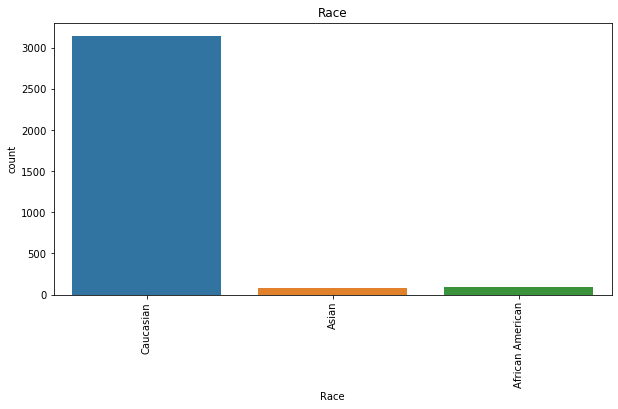

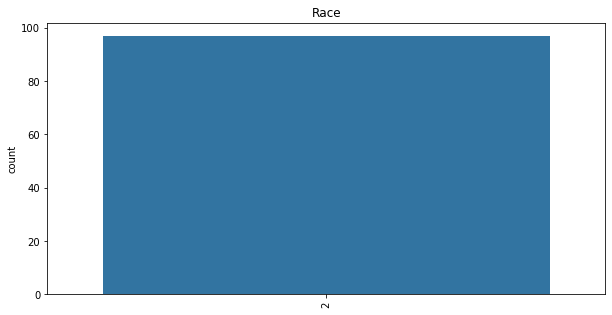

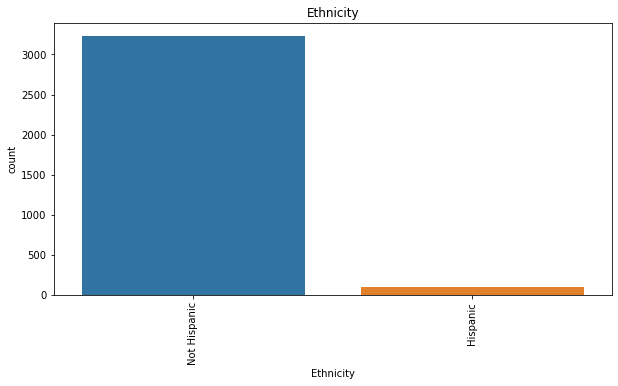

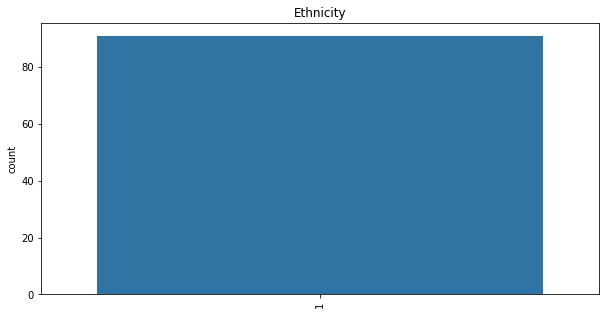

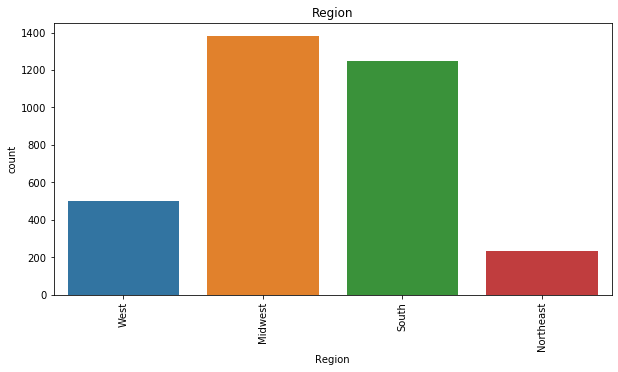

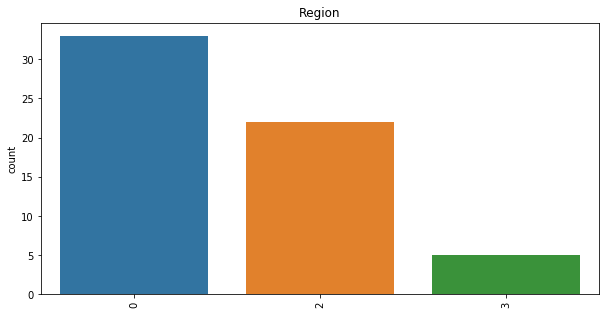

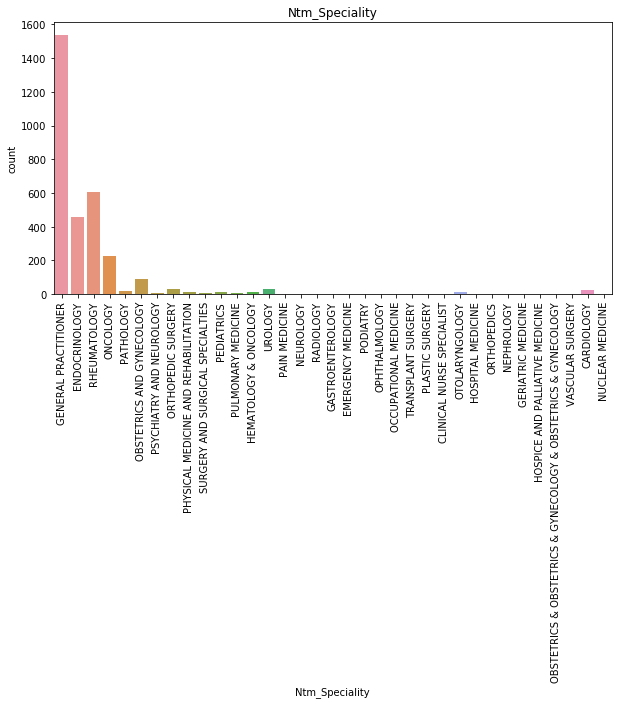

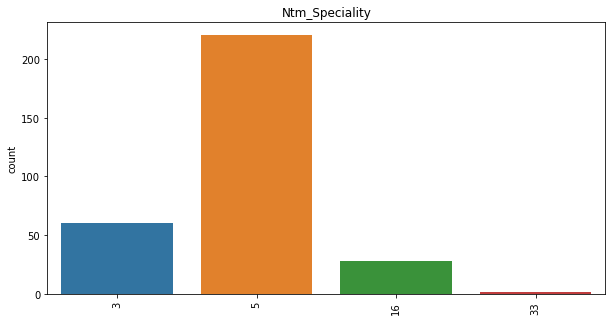

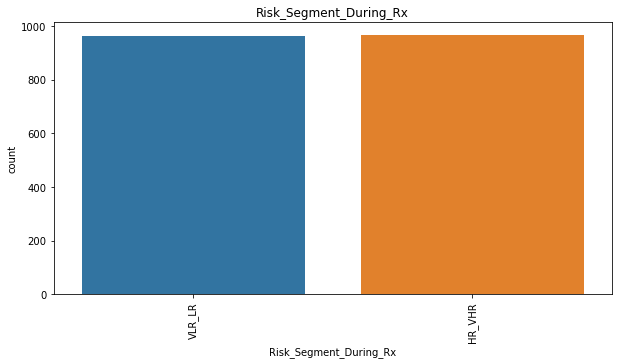

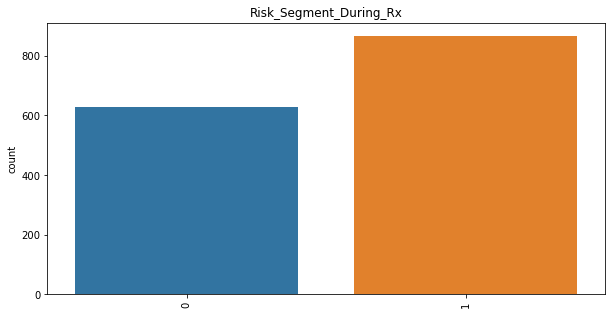

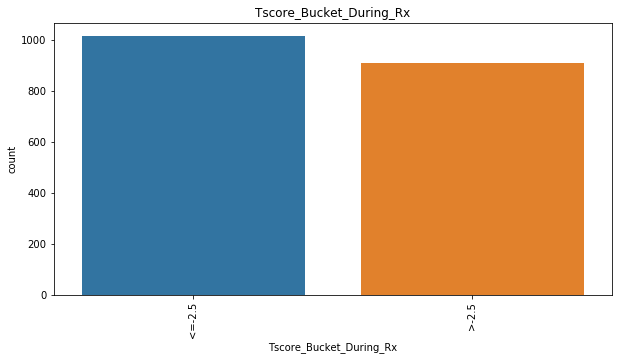

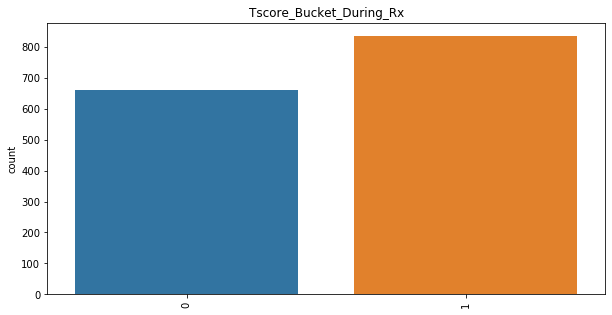

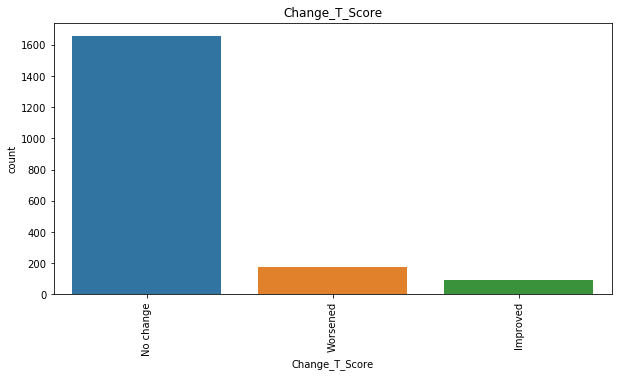

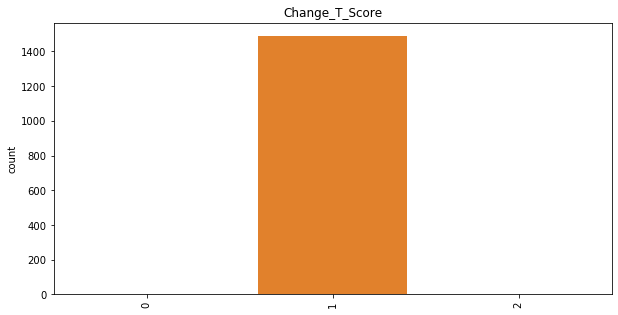

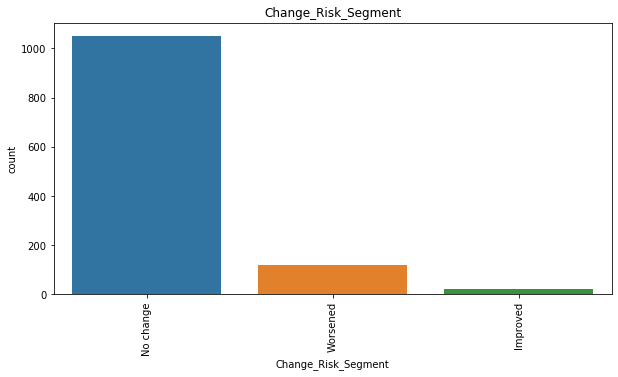

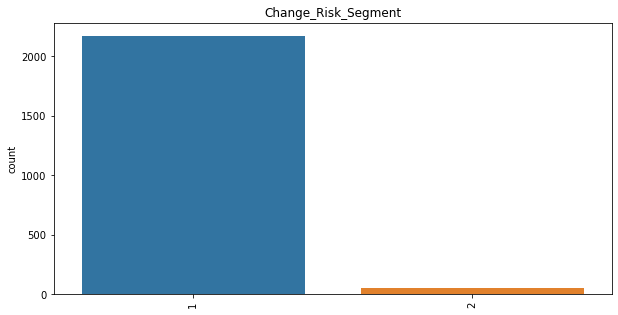

In [9]:
lr  = LogisticRegression(solver='newton-cg', random_state=0,class_weight=None)
for column_predict in list_column_nan:
    ds_copy = ds.copy()
    list_column_to_be_deleted = [i for i in list_column_nan if i!= column_predict ]
    ds_copy.drop( list_column_to_be_deleted, axis=1, inplace=True)
#     ds_copy.drop('Ptid', axis=1, inplace=True)
    
    X_train = ds_copy[ds_copy[column_predict].notnull()]
    X_train.drop('Ptid', axis=1, inplace=True)
    X_test = ds_copy[pd.isnull(ds_copy[column_predict])]
    new_predicted_df = pd.DataFrame (X_test['Ptid'])
    X_test.drop('Ptid', axis=1, inplace=True)
    
    list_column_label = [x for x in list_columns_need_labelling if x not in list_column_to_be_deleted ]
    
    le = preprocessing.LabelEncoder()

    for column in list_column_label:
        new_column_name = "{}_labels".format(column)
        if column != column_predict:
            X_train[new_column_name] = le.fit_transform(X_train[[column]])
            X_test[new_column_name] = le.fit_transform(X_test[[column]])
        else:
            y_train = pd.DataFrame(le.fit_transform(X_train[[column]]))
        
            print(le.classes_)
            print(le.transform(le.classes_))
            
            plt.figure(figsize=(10, 5))
            sns.countplot(X_train[column_predict])
            plt.xticks(rotation=90)
            plt.title(column_predict)
            
            
    
    X_train = X_train.select_dtypes(include= np.number)
    X_test =  X_test.select_dtypes(include= np.number)
    
    print(X_train.shape)
    print(X_test.shape)
    
    lr.fit(X_train, y_train)
    predictions = lr.predict(X_test)
    
    new_predicted_df['{}'.format(column_predict)] = predictions
#     print(new_predicted_df.head())
    new_predicted_df.to_csv("predicted_{}_df".format(column_predict))
    
    plt.figure(figsize=(10, 5))
    sns.countplot(predictions)
    plt.xticks(rotation=90)
    plt.title(column_predict)


## Outliers

Why the outliers are a problem?

They do not contribute to model learning. The values are irrelevat and the model will only learn the dominant cathegories.
Large data slws down the training time, and for no reason.

- We can delete irrelevant data. 

- We can speed training by only trying dimensionality reduction algorithms whic will only learn using the most relevant data.


Step 1 : 

    -delete entirely the columns that 90% contain only one category value out of 2
    -from the rest of the columns delete rows that contain the outlier values
    

# Delete uncesessary columns

In [173]:
len(ds.columns)

69

In [174]:
list_columns_deleted = ['Ptid', 'Gender','Risk_Type_1_Insulin_Dependent_Diabetes','Risk_Osteogenesis_Imperfecta','Risk_Rheumatoid_Arthritis','Risk_Untreated_Chronic_Hyperthyroidism','Risk_Untreated_Chronic_Hypogonadism','Risk_Untreated_Early_Menopause','Risk_Patient_Parent_Fractured_Their_Hip','Risk_Chronic_Liver_Disease','Risk_Low_Calcium_Intake','Risk_Poor_Health_Frailty','Risk_Excessive_Thinness','Risk_Hysterectomy_Oophorectomy','Risk_Estrogen_Deficiency','Risk_Immobilization','Risk_Recurring_Falls']


In [175]:
ds.drop(list_columns_deleted, axis=1, inplace=True)

In [176]:
len(ds.columns)

52

# Label categorical columns as numerical values

In [177]:
list_columns_need_labelling = ['Persistency_Flag', 'Race','Ethnicity','Region','Age_Bucket','Ntm_Speciality','Ntm_Specialist_Flag','Ntm_Speciality_Bucket','Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment', 'Adherent_Flag']

In [178]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

for column in list_columns_need_labelling:
    new_column_name = "{}_labels".format(column)
    ds[new_column_name] = ord_enc.fit_transform(ds[[column]])

In [179]:
len(ds.columns)

67

# Make a new dataframe with only numerical values that will be prepared for model training

In [180]:
import numpy as np
process_df = ds.select_dtypes(include= np.number)

In [181]:
len(process_df.columns)

52

# Delete outliers

In [182]:
list_columns_contain_outliers = ['Race_labels','Ethnicity_labels','Region_labels', 'Ntm_Speciality_labels', 'Dexa_Freq_During_Rx', 'Adherent_Flag_labels']

In [183]:
process_df.shape

(3424, 52)

In [184]:
for column in list_columns_contain_outliers:
    category_counts = process_df.value_counts(column)
    values_category_counts = list(category_counts)                                          
    for element in range(len(values_category_counts)):
        if values_category_counts[element] < 100:
            process_df.drop(process_df.loc[process_df[column]==category_counts.index[element]].index, inplace=True)

D:\Programs\Anaconda\envs\envi\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
D:\Programs\Anaconda\envs\envi\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
D:\Programs\Anaconda\envs\envi\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
D:\Programs\Anaconda\envs\en

In [185]:
process_df.shape

(1894, 52)

In [187]:
process_df.to_csv('data_training.csv', index = False)

In [491]:
data_training = pd.read_csv('data_training.csv')

In [492]:
data_training.shape

(1894, 52)

In [542]:
X = data_training.drop('Persistency_Flag_labels', 1)
y = data_training['Persistency_Flag_labels']

D:\Programs\Anaconda\envs\envi\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


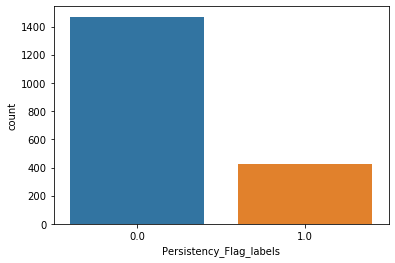

In [543]:
sns.countplot(y)

After deleting uncessary columns and outliers, the difference between target classes has become larger. We deal now with clearly imblanced data

Train with data as it is

In [547]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [548]:
X_train.shape

(1515, 51)

In [549]:
X_test.shape

(379, 51)

In [550]:
from sklearn import svm 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

C_param = 1 
svm_model = svm.SVC(C_param, "linear", probability= True) 
svm_model.fit(X_train, y_train) 
 

D:\Programs\Anaconda\envs\envi\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass C=1, kernel=linear as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


SVC(C=1, kernel='linear', probability=True)

In [551]:
predicted_labels_test = svm_model.predict(X_test)

In [552]:
confusion_matrix(y_test, predicted_labels_test)

array([[285,  14],
       [ 51,  29]], dtype=int64)

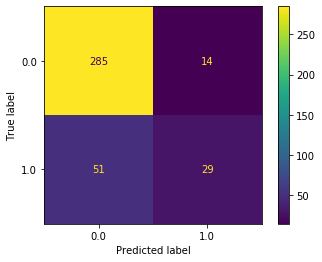

In [553]:
plot_confusion_matrix(svm_model, X_test, y_test)  
plt.show()

In [554]:
print('Classification report', classification_report(y_test,predicted_labels_test))

Classification report               precision    recall  f1-score   support

         0.0       0.85      0.95      0.90       299
         1.0       0.67      0.36      0.47        80

    accuracy                           0.83       379
   macro avg       0.76      0.66      0.68       379
weighted avg       0.81      0.83      0.81       379



 - Precision gives the percentage of the correct prediction from all values predicted positive.
    P= TP/(TP+FP)
 - Recall measure the percentage of the correct prediction from all values that were actually positive. 
    R= TP/(TP+FN)
 - F1 score weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
     F1 score= 2*(R*P)/(R+P)
 - Support is the number of actual occurrences of the class in the specified dataset.

In [555]:
svm_model.predict_proba(X_test)


array([[0.15052524, 0.84947476],
       [0.91820205, 0.08179795],
       [0.94347655, 0.05652345],
       [0.92397946, 0.07602054],
       [0.56004051, 0.43995949],
       [0.69817263, 0.30182737],
       [0.6215811 , 0.3784189 ],
       [0.85246148, 0.14753852],
       [0.8988893 , 0.1011107 ],
       [0.6334423 , 0.3665577 ],
       [0.96157543, 0.03842457],
       [0.94299326, 0.05700674],
       [0.83883047, 0.16116953],
       [0.49203286, 0.50796714],
       [0.68935983, 0.31064017],
       [0.14604211, 0.85395789],
       [0.8421987 , 0.1578013 ],
       [0.94039495, 0.05960505],
       [0.9601955 , 0.0398045 ],
       [0.85095042, 0.14904958],
       [0.90137803, 0.09862197],
       [0.6518317 , 0.3481683 ],
       [0.90639586, 0.09360414],
       [0.1094505 , 0.8905495 ],
       [0.63120691, 0.36879309],
       [0.86942335, 0.13057665],
       [0.89424095, 0.10575905],
       [0.85704175, 0.14295825],
       [0.94807361, 0.05192639],
       [0.92867464, 0.07132536],
       [0.

[0.17989728, 0.82010272] -> clearly the second class

[0.96589305, 0.03410695] -> clearlt the first class

The Probability is not random one. Considering the imbalacing condition, this is a very good result.

In [556]:
print('ROC AUC score on test data', roc_auc_score(y_test,svm_model.predict_proba(X_test)[:, 1] ))

print('ROC AUC score on the entire dataset', roc_auc_score(y, svm_model.decision_function(X)))

ROC AUC score on test data 0.7947324414715718
ROC AUC score on the entire dataset 0.8286805750210227


Apply PCA dimensionality reduction and train again

Apply PCA on the whole dataset

In [557]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=51)
pca.fit(X)
X_pca = pca.transform(X)

Show what number of components has the best variance

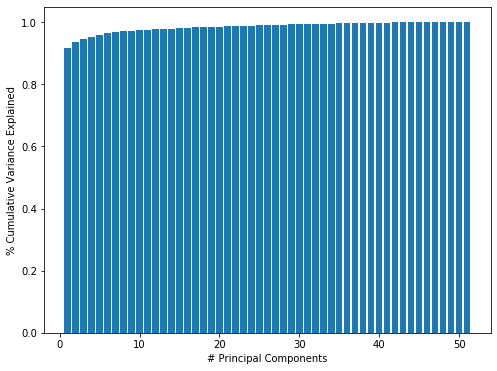

In [558]:
cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,52), cum_exp_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained');

From this graph we can see that the variance is improving with the number of fetures. The best variance is reahed when having all features. The dimensonality reduction is not suitable in this case.

D:\Programs\Anaconda\envs\envi\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass C=1, kernel=linear as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


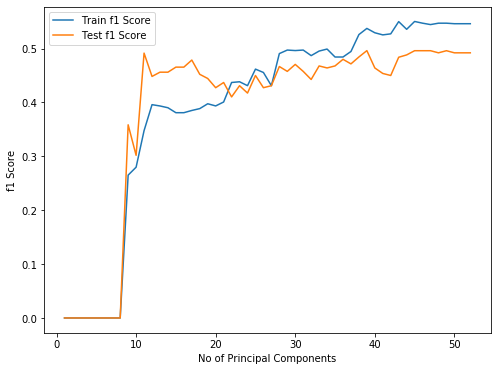

In [559]:
from sklearn.metrics import f1_score

train_f1 = []
test_f1 = []

C_param = 1 
svm_model = svm.SVC(C_param, "linear", probability= True)

for i in range(52):
    
    X = X_pca[:,0:i+1]
    
    #split dataset on which we have applied PCA
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y,
                                                        test_size=0.2,
                                                        random_state=30)
    #normalise features
    sc = StandardScaler()
    X_train_pca = sc.fit_transform(X_train_pca)
    X_test_pca = sc.transform(X_test_pca)

    svm_model.fit(X_train_pca, y_train_pca) 

    y_pred_train = svm_model.predict(X_train_pca)
    y_pred_test = svm_model.predict(X_test_pca)
    train_f1.append(f1_score(y_train, y_pred_train))
    test_f1.append(f1_score(y_test, y_pred_test))

# Plot accuracy by n_neighbors
plt.figure(figsize=(8, 6))
plt.plot(range(1,53), train_f1, label='Train f1 Score')
plt.plot(range(1,53), test_f1, label='Test f1 Score')
plt.ylabel('f1 Score')
plt.xlabel('No of Principal Components')
plt.legend()
plt.show()

The best F1 score is reached with all 51 features. We need all features to get a good result. 

In [560]:
#see that with fewest features, the results are worsen (change number of feture taken from X_pca)
X = X_pca[:,0:52]

   
#split dataset on which we have applied PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=30)
#normalise features
sc = StandardScaler()
X_train_pca = sc.fit_transform(X_train_pca)
X_test_pca = sc.transform(X_test_pca)

svm_model.fit(X_train_pca, y_train_pca) 

y_pred_train = svm_model.predict(X_train_pca)
y_pred_test = svm_model.predict(X_test_pca)
    
print(f'Train f1 Score: {f1_score(y_train_pca, y_pred_train)}')
print(f'Test f1 Score: {f1_score(y_test_pca, y_pred_test)}')
print(classification_report(y_test_pca, y_pred_test))

Train f1 Score: 0.5460992907801419
Test f1 Score: 0.4920634920634921
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90       299
         1.0       0.67      0.39      0.49        80

    accuracy                           0.83       379
   macro avg       0.76      0.67      0.70       379
weighted avg       0.82      0.83      0.81       379



In [561]:
confusion_matrix(y_test_pca, y_pred_test)

array([[284,  15],
       [ 49,  31]], dtype=int64)

In [562]:
print('ROC AUC score on test data', roc_auc_score(y_test_pca,svm_model.predict_proba(X_test_pca)[:, 1] ))

print('ROC AUC score on the entire dataset', roc_auc_score(y, svm_model.decision_function(X)))

ROC AUC score on test data 0.794732441471572
ROC AUC score on the entire dataset 0.774468425899972


Upsampling

In [563]:
data_training = pd.read_csv('data_training.csv')

In [564]:
data_training['Persistency_Flag_labels'].value_counts()

0.0    1469
1.0     425
Name: Persistency_Flag_labels, dtype: int64

In [565]:
from sklearn.utils import resample

data_when_false = data_training[data_training['Persistency_Flag_labels']==0]
data_when_true = data_training[data_training['Persistency_Flag_labels']==1]

data_when_false_upsampled = resample(data_when_true,
                          replace=True, 
                          n_samples=len(data_when_false), 
                          random_state=27)

upsampled = pd.concat([data_when_false, data_when_false_upsampled])

upsampled['Persistency_Flag_labels'].value_counts()

0.0    1469
1.0    1469
Name: Persistency_Flag_labels, dtype: int64

In [569]:
X = upsampled.drop('Persistency_Flag_labels', 1)
y = upsampled['Persistency_Flag_labels']

In [570]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [571]:
X_train.shape

(2350, 51)

In [572]:
X_test.shape

(588, 51)

In [573]:
C_param = 1 
svm_model = svm.SVC(C_param, "linear", probability= True) 
svm_model.fit(X_train, y_train) 

D:\Programs\Anaconda\envs\envi\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass C=1, kernel=linear as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


SVC(C=1, kernel='linear', probability=True)

In [574]:
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)
    
print(f'Train f1 Score: {f1_score(y_train, y_pred_train)}')
print(f'Test f1 Score: {f1_score(y_test, y_pred_test)}')
print(classification_report(y_test, y_pred_test))

Train f1 Score: 0.7626596213121972
Test f1 Score: 0.7412353923205341
              precision    recall  f1-score   support

         0.0       0.71      0.76      0.73       279
         1.0       0.77      0.72      0.74       309

    accuracy                           0.74       588
   macro avg       0.74      0.74      0.74       588
weighted avg       0.74      0.74      0.74       588



In [575]:
confusion_matrix(y_test, y_pred_test)

array([[211,  68],
       [ 87, 222]], dtype=int64)

In [576]:
print('ROC AUC score on test data', roc_auc_score(y_test,svm_model.predict_proba(X_test)[:, 1] ))

print('ROC AUC score on the entire dataset', roc_auc_score(y, svm_model.decision_function(X)))

ROC AUC score on test data 0.8145132291702915
ROC AUC score on the entire dataset 0.8370535890129618


The accuracy is even lower. By upsampling the true classes is not a solution to improvement.

Downsampling

In [577]:
data_when_false_downsampled = resample(data_when_false,
                          replace=True, 
                          n_samples=len(data_when_true), 
                          random_state=27)

downsampled = pd.concat([data_when_true, data_when_false_downsampled])

downsampled['Persistency_Flag_labels'].value_counts()

0.0    425
1.0    425
Name: Persistency_Flag_labels, dtype: int64

In [580]:
X = downsampled.drop('Persistency_Flag_labels', 1)
y = downsampled['Persistency_Flag_labels']

In [581]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [582]:
X_train.shape

(680, 51)

In [583]:
X_test.shape

(170, 51)

In [584]:
C_param = 1 
svm_model = svm.SVC(C_param, "linear", probability= True) 
svm_model.fit(X_train, y_train) 

D:\Programs\Anaconda\envs\envi\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass C=1, kernel=linear as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


SVC(C=1, kernel='linear', probability=True)

In [585]:
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)
    
print(f'Train f1 Score: {f1_score(y_train, y_pred_train)}')
print(f'Test f1 Score: {f1_score(y_test, y_pred_test)}')
print(classification_report(y_test, y_pred_test))

Train f1 Score: 0.7771084337349399
Test f1 Score: 0.6625766871165645
              precision    recall  f1-score   support

         0.0       0.66      0.73      0.69        84
         1.0       0.70      0.63      0.66        86

    accuracy                           0.68       170
   macro avg       0.68      0.68      0.68       170
weighted avg       0.68      0.68      0.68       170



In [586]:
confusion_matrix(y_test, y_pred_test)

array([[61, 23],
       [32, 54]], dtype=int64)

In [587]:
print('ROC AUC score on test data', roc_auc_score(y_test,svm_model.predict_proba(X_test)[:, 1] ))

print('ROC AUC score on the entire dataset', roc_auc_score(y, svm_model.decision_function(X)))

ROC AUC score on test data 0.7679955703211517
ROC AUC score on the entire dataset 0.8345356401384083


The results are even worst.

Conclusions

 - In terms of accuracy, removing outliers does not influence so much model training, but it definitely speeds it up, especially if we are dealing with large datasets.
 
 - 51 features is the ideal number in order to get best results using SVM classifier.

 - There is no need for dimensionality reductin as smaller fetures lead to worsen results.

 - Altough the target classes are imbalanced, by applying upsampling and downsampling in order to reprodiuce the same number of target classes data, the results are getting worst.